In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:

import tarfile
import urllib
import pandas as pd

In [3]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/" #data source root
HOUSING_PATH = os.path.join("datasets", "housing") #unclear what this does
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz" #Actual URL
print(HOUSING_PATH)

datasets\housing


In [4]:

# this defines a function "fetch_housing_data" which takes a URL and a path as input 
# downloads the data and puts it in specified location and extracts it
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz") #this is where the target file ends up
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    return

# fetch_housing_data() #only need to run once

In [5]:
# creates a function that loads the data as a pandas dataframe.
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,'housing.csv')
    return pd.read_csv(csv_path)

housing=load_housing_data() #loads the data into a pandas dataframe


In [15]:

housing.head() #shows the first 5 rows of the data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:

housing.tail() #shows the last 5 rows of the data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [8]:

housing.info() #gives a summary of the data

# data 
# RangeIndex: 20640 entries, 0 to 20639
# Data columns (total 10 columns):
#  #   Column              Non-Null Count  Dtype  
# ---  ------              --------------  -----  
#  0   longitude           20640 non-null  float64
#  1   latitude            20640 non-null  float64
#  2   housing_median_age  20640 non-null  float64
#  3   total_rooms         20640 non-null  float64
#  4   total_bedrooms      20433 non-null  float64 <--- note that this is less than 20640
#  5   population          20640 non-null  float64
#  6   households          20640 non-null  float64
#  7   median_income       20640 non-null  float64
#  8   median_house_value  20640 non-null  float64
#  9   ocean_proximity     20640 non-null  object 
# dtypes: float64(9), object(1)
# memory usage: 1.6+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing["ocean_proximity"].value_counts() #shows the unique values in the column and how many times they occur

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
#note nulls and object Dtype are ignored
housing.describe() #gives a summary of the numerical data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

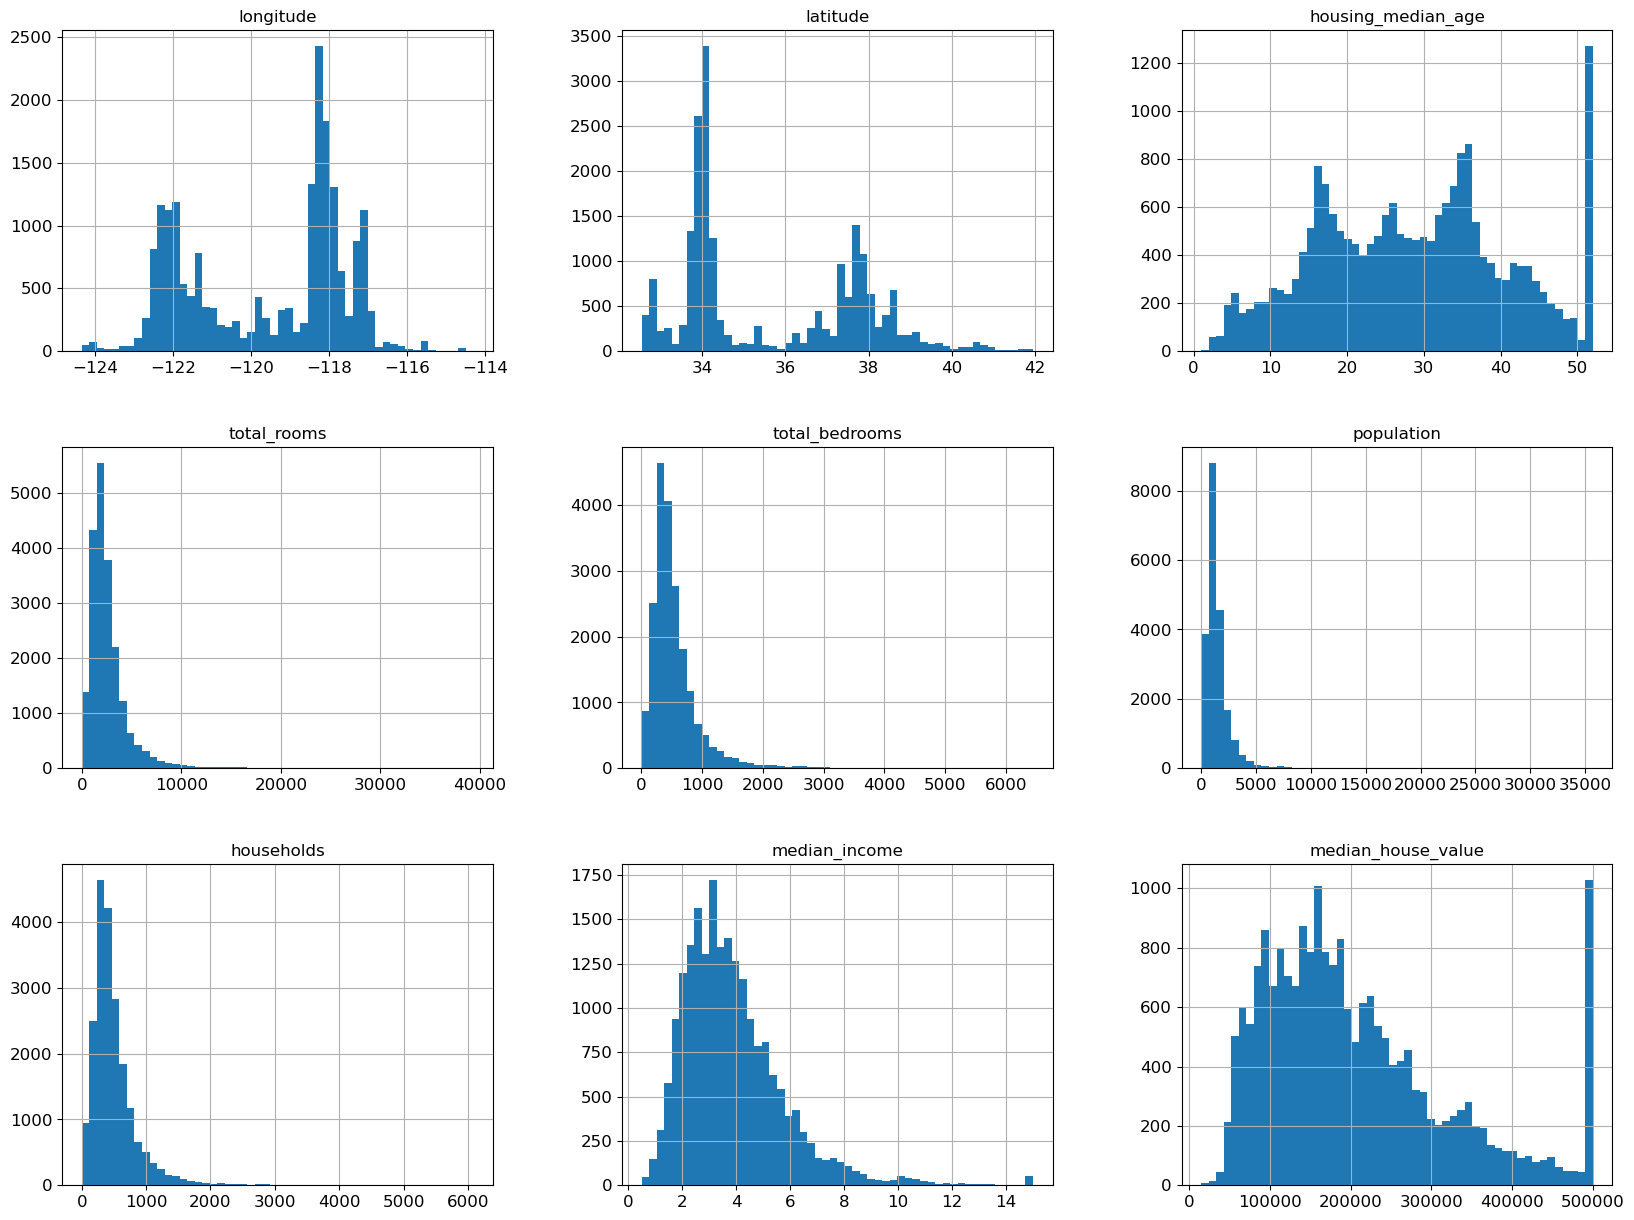

In [13]:
import matplotlib.pyplot as plt
housing.hist(bins=52,figsize=(20,15))


In [16]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))  #random shuffling of all numbers between 0 and 20639
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    print(len(train_indices),len(test_indices))
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2) #this is a random split of the data into 80% train and 20% test
print(len(train_set),len(test_set))
test_set.info()


16512 4128
16512 4128
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 13150 to 7459
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4084 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


In [17]:
#skipping some stuff related to the test set creation to cut to the easy way

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=685) #this is a random split of the data into 80% train and 20% test
test_set.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 3300 to 9663
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4086 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

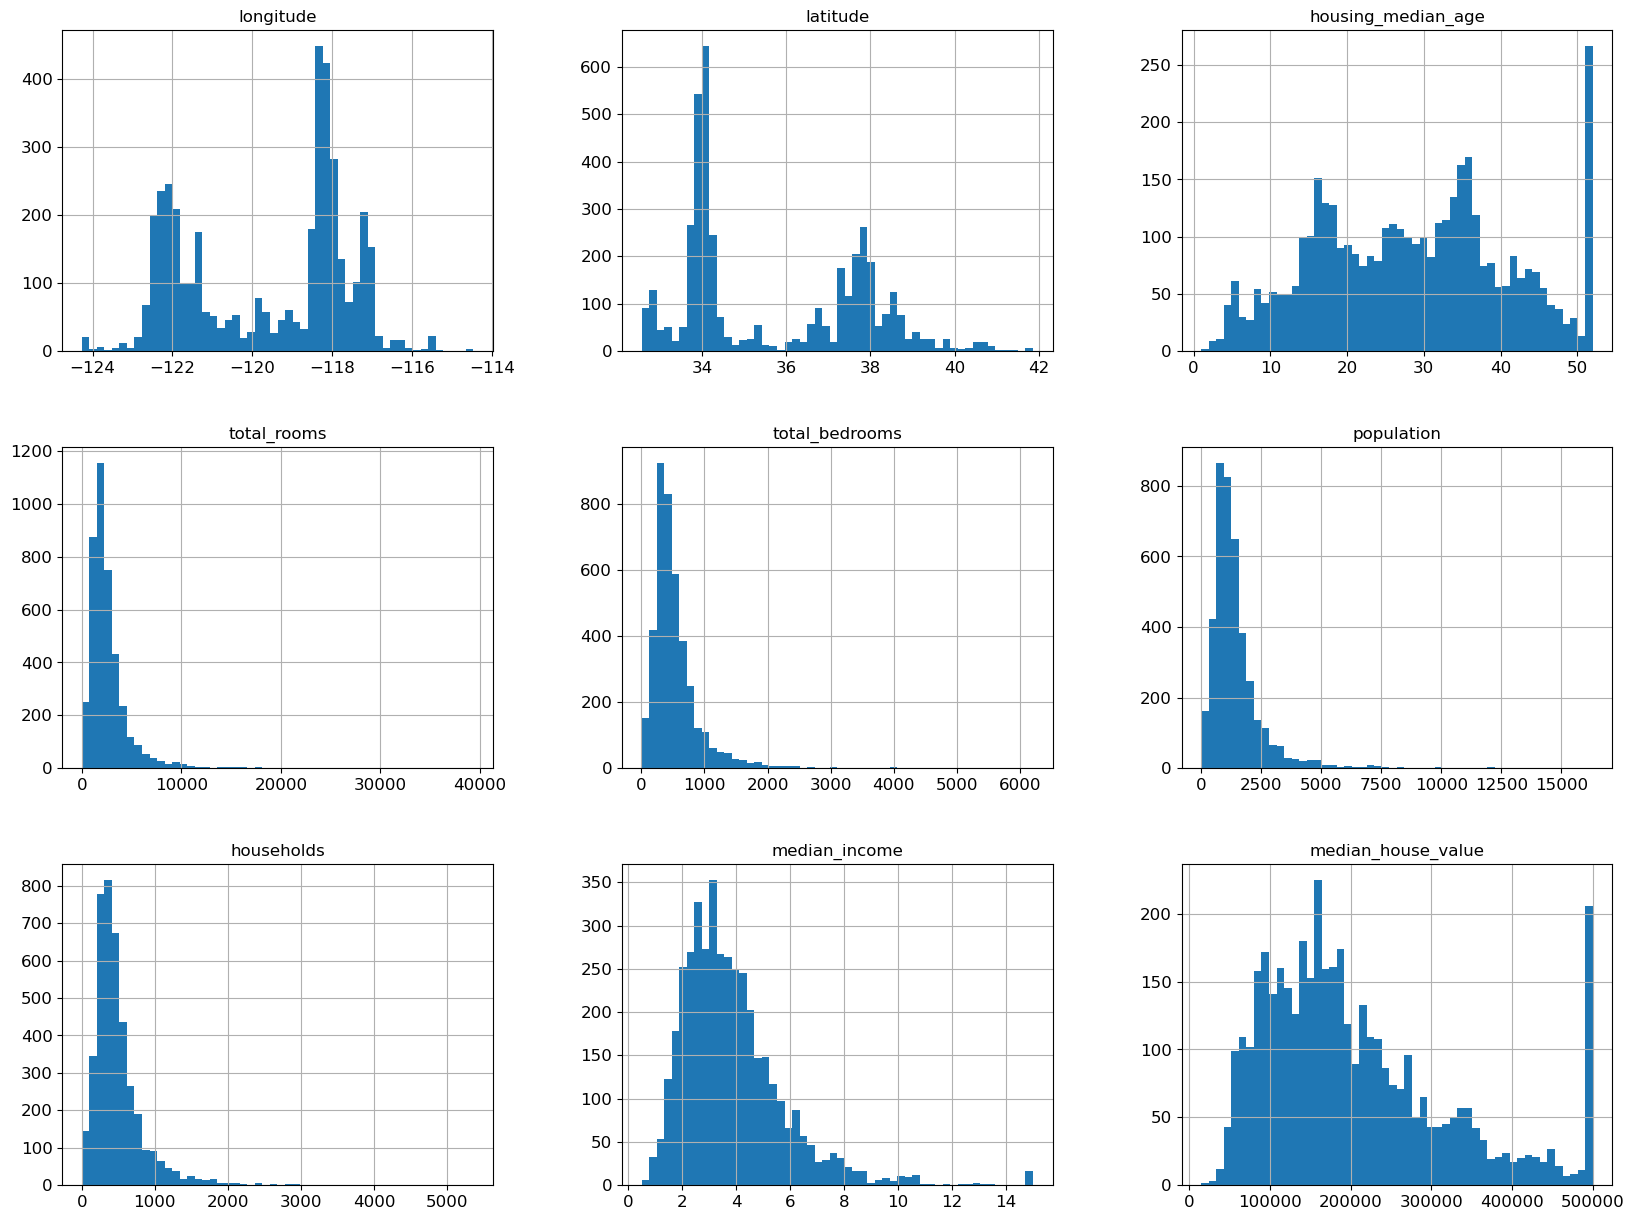

In [19]:
test_set.hist(bins=52,figsize=(20,15)) #this is the test set

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

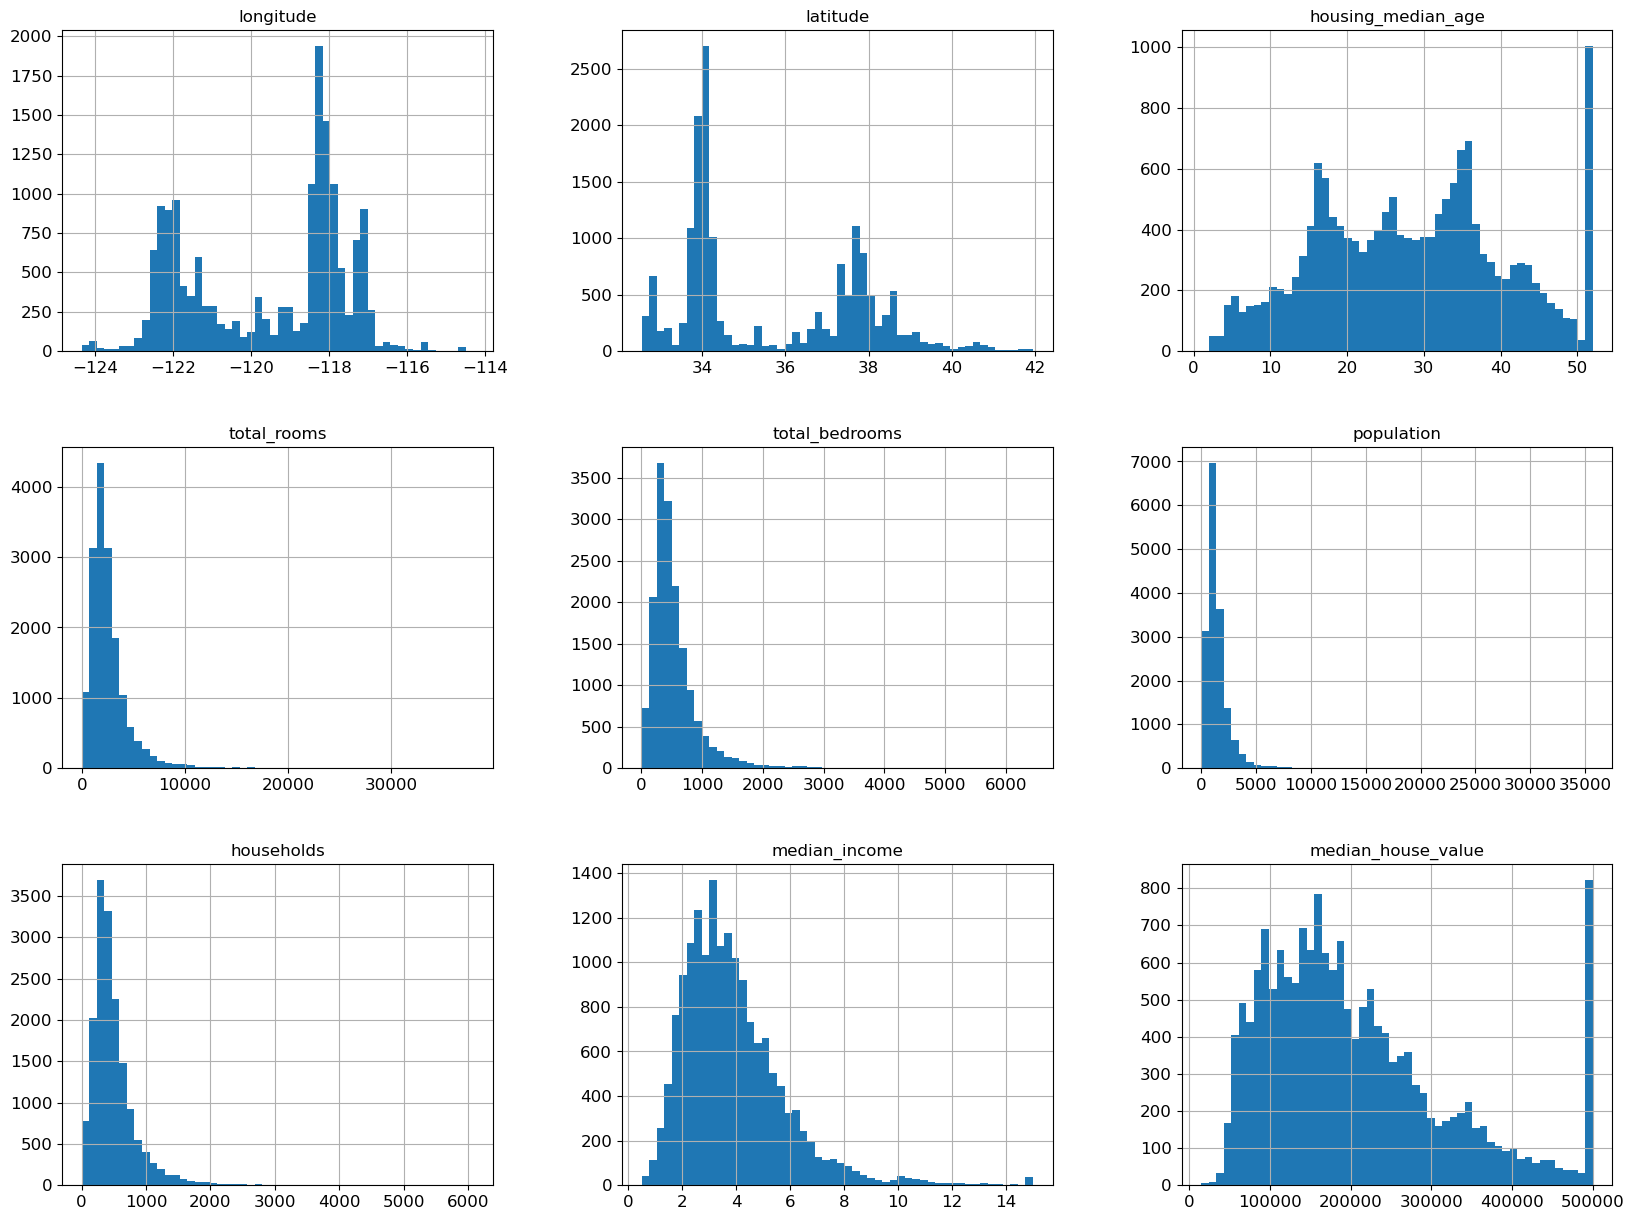

In [20]:
train_set.hist(bins=52,figsize=(20,15)) #this is the train set

<AxesSubplot:>

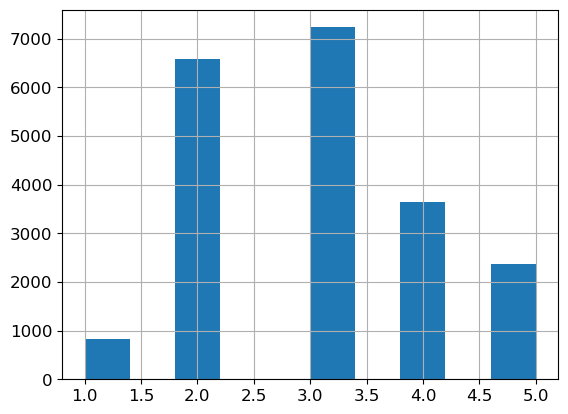

In [22]:
# the median income is an important feature, so we want to make sure that the test set is representative of the whole data set
housing["income_cat"]=pd.cut(housing["median_income"], #this creates a new column in the dataframe
bins=[0.,1.5,3.0,4.5,6.,np.inf], #this is the binning
labels=[1,2,3,4,5]) #this is the label for each bin

housing["income_cat"].hist() #this shows the distribution of the new column

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) #this creates a stratified shuffle split data type to use ensure even sampling from each strata

# this is a generator, so it needs to be iterated over to get the actual data
for train_index, test_index in split.split(housing, housing["income_cat"]): 
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]




In [15]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set) #this shows the distribution of the income_cat data in the test set

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [16]:
housing["income_cat"].value_counts() / len(housing) #this shows the distribution of the income_cat data in the whole data set; note it matches the test set

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [24]:
def income_cat_proportions(data, column): #this is a function to show the distribution of the income_cat data in any data set
    return data[column].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing, "income_cat"),
    "Stratified": income_cat_proportions(strat_test_set, "income_cat"),
    "Random": income_cat_proportions(test_set, "income_cat"),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [18]:
compare_props #this shows the difference between the stratified and random sampling on the test set; #note that the stratified sampling is much closer to the whole data set

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [19]:
# removing income_cat so data is in original state
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Discover and visualize the data

In [26]:
# Following text, but don't like the overwrite of the original "housing" data set at this point, 
# so I created a new data set called housing_tr
housing_tr = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

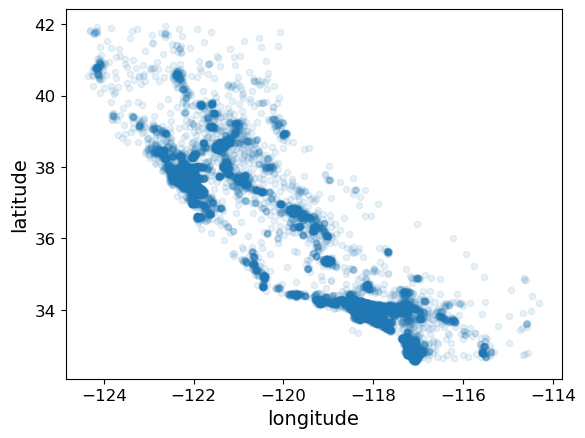

In [27]:
housing_tr.plot(kind="scatter",x="longitude",y="latitude", alpha=0.1)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

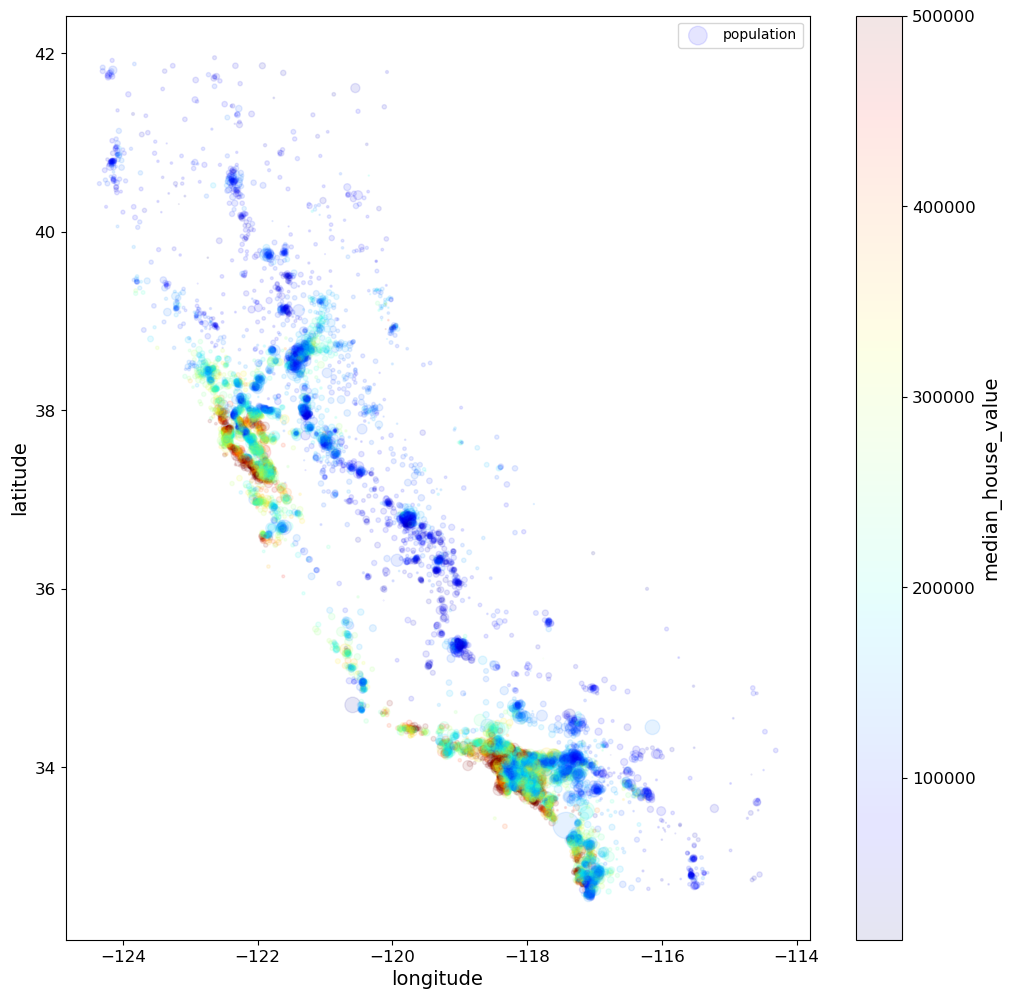

In [28]:
housing_tr.plot(kind="scatter",x="longitude",y="latitude", alpha=0.1,
s=housing_tr["population"]/100,label="population", figsize=(12,12),
c="median_house_value",cmap=plt.get_cmap("jet"),colorbar="True")

In [30]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x1b468b41270>)

Saving figure california_housing_prices_plot


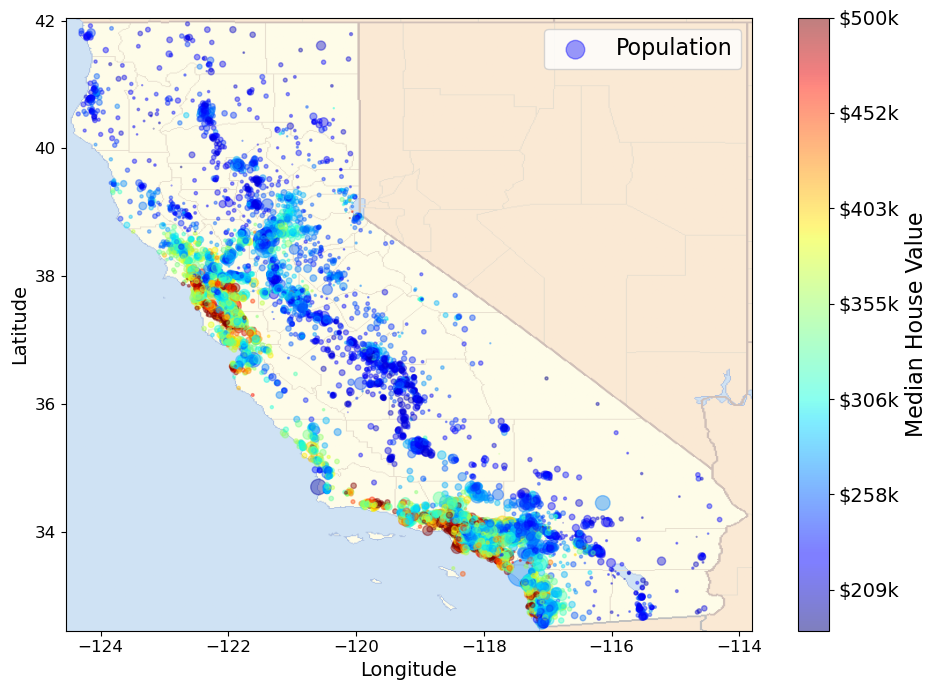

In [34]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing_tr.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing_tr['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing_tr["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

# Looking for correlations

In [40]:
corr_matrix=housing_tr.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

Saving figure scatter_matrix_plot


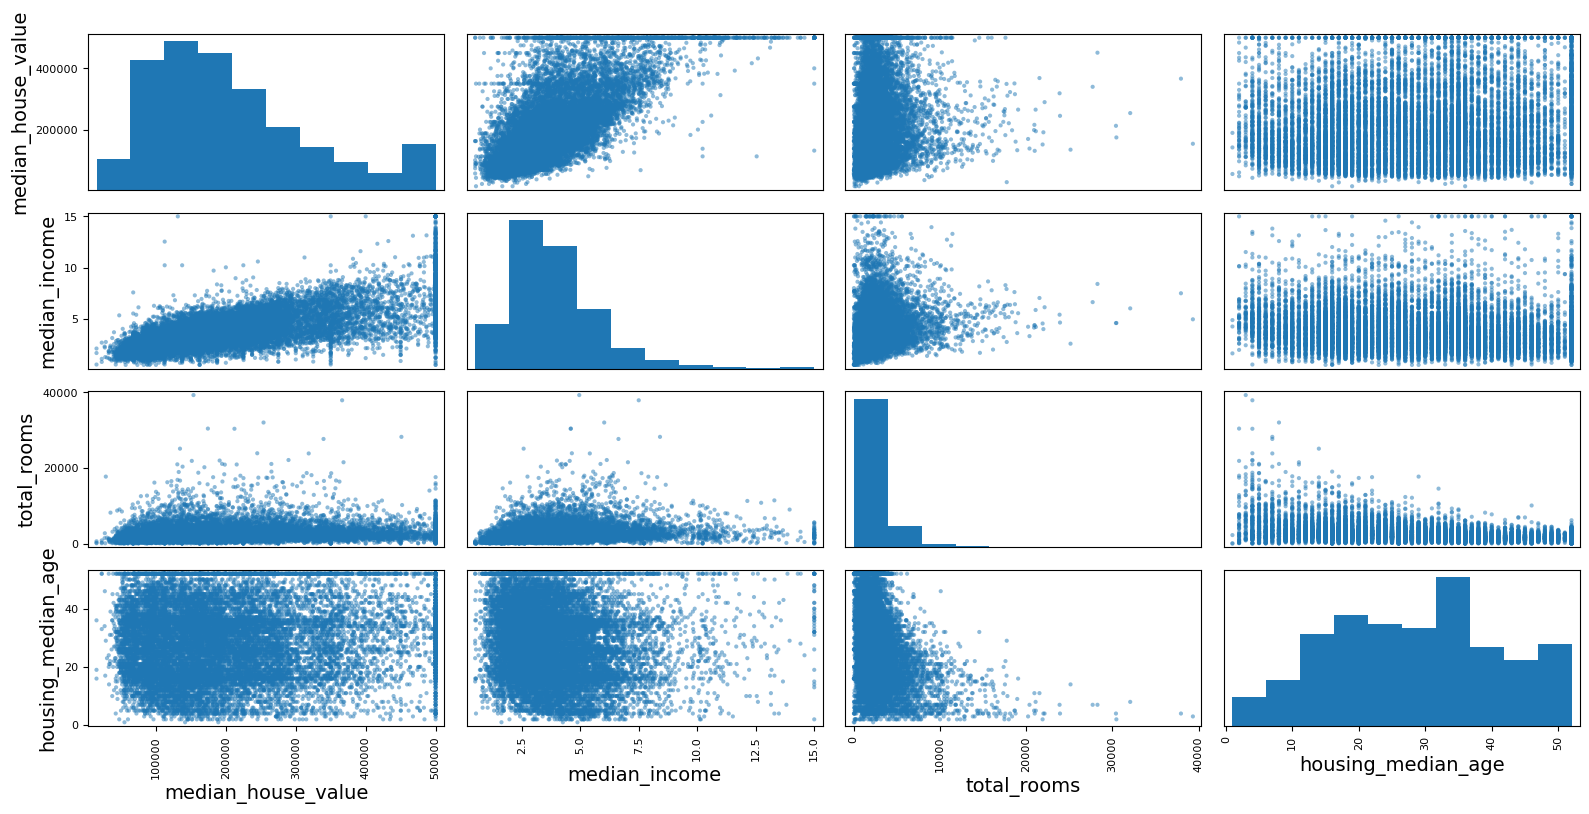

In [41]:

from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing_tr[attributes], figsize=(16, 8))
save_fig("scatter_matrix_plot")

(0.0, 520000.0)

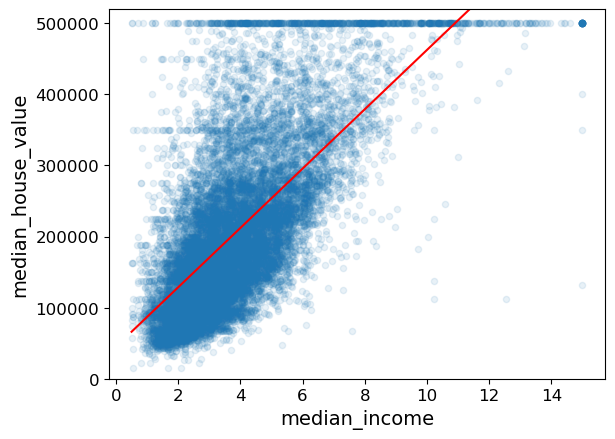

In [42]:
#plot the median income vs the median house value with a regression line
housing_tr.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)
# add a linear regression line
plt.plot(np.unique(housing_tr["median_income"]), np.poly1d(np.polyfit(housing_tr["median_income"], housing_tr["median_house_value"], 1))(np.unique(housing_tr["median_income"])), color='red')

#set the y-axis limits
plt.ylim(0, 520000)



In [43]:
# create new features for rooms per household, bedrooms per room, and population per household
housing_tr["rooms_per_household"] = housing_tr["total_rooms"]/housing_tr["households"] #create a new column for rooms per household
housing_tr["bedrooms_per_room"] = housing_tr["total_bedrooms"]/housing_tr["total_rooms"] #create a new column for bedrooms per total room count
housing_tr["population_per_household"]=housing_tr["population"]/housing_tr["households"] #create a new column for population per household
corr_matrix = housing_tr.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

# Prepare data for ML algorithms

In [51]:
# create a new data set with the original data set minus the median_house_value column which is the target
# unclear if we want the previously created features or not, so I'm not including them yet

housing_tr_x = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_tr_y = strat_train_set["median_house_value"].copy() # create a new data set with just the median_house_value column
median_tb = strat_train_set["total_bedrooms"].median() # compute median for total_bedrooms for the train set


In [52]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median") # create an imputer object

In [59]:
housing_tr_x_numerical = housing_tr_x.drop("ocean_proximity", axis=1) # create a new data set with just the numerical values
housing_tr_x_cat=housing_tr_x[["ocean_proximity"]] # create a new data set with just the categorical values
imputer.fit(housing_tr_x_numerical) # fit the imputer to the data set; basicall finding the median of each column
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155,    3.     ])

In [47]:
X = imputer.transform(housing_tr_x_numerical) # transform the data set by replacing the missing values with the median


In [54]:

# put the transformed data set back into a pandas data frame
housing_tr_x_numerical = pd.DataFrame(X, columns=housing_tr_x_numerical.columns,
                          index=housing_tr_x_numerical.index)

In [58]:
# Confirming NaNs are gone
housing_tr_x_numerical.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,533.939438,1419.687379,497.011810,3.875884,3.006783
std,2.001828,2.137963,12.574819,2138.417080,410.806260,1115.663036,375.696156,1.904931,1.054600
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,1.000000
25%,-121.800000,33.940000,18.000000,1443.000000,296.000000,784.000000,279.000000,2.566950,2.000000
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,3.000000
75%,-118.010000,37.720000,37.000000,3141.000000,641.000000,1719.000000,602.000000,4.745325,4.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,5.000000


# Handling text and categorical attributes

In [60]:
housing_tr_x_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [62]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder() # create an ordinal encoder object
housing_cat_encoded = ordinal_encoder.fit_transform(housing_tr_x_cat) # fit and transform the data set
housing_cat_encoded[:10] # show the first 10 rows

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [63]:
ordinal_encoder.categories_ # show the categories

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [65]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False) # create a one hot encoder object
housing_cat_1hot = cat_encoder.fit_transform(housing_tr_x_cat) # fit and transform the data set
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [66]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Custom Transformers
Let's create a custom transformer to add extra attributes:

In [67]:
# create a custom transformer whuch add the new features
# this is a class that will be used in a pipeline
# this class will add the new features to the data set


from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6 # column numbers for the features

class CombinedAttributesAdder(BaseEstimator, TransformerMixin): # create a class for adding new features
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False) # create an instance of the class; an object
housing_tr_x_extra_attribs = attr_adder.transform(housing_tr_x.values) # transform the data set




Note that I hard coded the indices (3, 4, 5, 6) for concision and clarity in the book, but it would be much cleaner to get them dynamically, like this:

In [68]:
# col_names = "total_rooms", "total_bedrooms", "population", "households"
# rooms_ix, bedrooms_ix, population_ix, households_ix = [
#     housing_tr_x.columns.get_loc(c) for c in col_names] # get the column in

In [69]:
## this cell is not in text

# housing_extra_attribs = pd.DataFrame(
#     housing_extra_attribs,
#     columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
#     index=housing.index)
# housing_extra_attribs.head()

ValueError: Shape of passed values is (16512, 12), indices imply (20640, 13)

Transformation Pipelines
Now let's build a pipeline for preprocessing the numerical attributes:



In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), # impute the missing values with the median
        ('attribs_adder', CombinedAttributesAdder()), # add the new features; note that we defined this class above
        ('std_scaler', StandardScaler()),# scale the data set
    ])

housing_num_tr = num_pipeline.fit_transform(housing_tr_x_numerical) # fit and transform the data set to impute the missing values, add the new features, and scale the data set
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [72]:
from sklearn.compose import ColumnTransformer

# get the column names for the numerical and categorical columns
num_attribs = list(housing_tr_x_numerical) # get the column names for the numerical columns
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing_tr_x) # fit and transform the data set to impute the missing values, add the new features, scale the data set, and add one hot encoding of the categorical
housing_prepared #array

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [73]:
housing_prepared.shape

(16512, 17)

# Select and Train a Model


In [74]:
# Create a linear regression model

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() # create a linear regression object
lin_reg.fit(housing_prepared, housing_tr_y) # fit the model to the data set

LinearRegression()

In [75]:
# tryout the model on a few instances from the training set

some_data = housing_tr_x.iloc[:5] # get the first 5 rows of the data set
some_labels = housing_tr_y.iloc[:5] # get the first 5 rows of the target
some_data_prepared = full_pipeline.transform(some_data) # transform the data set
print("Predictions:", lin_reg.predict(some_data_prepared)) # predict the values
print("Labels:", list(some_labels)) # show the actual values

Predictions: [ 84000. 315008. 146112. 184256. 238304.]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [76]:
# compute the RMSE on the entire training set

from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared) # predict the values
lin_mse = mean_squared_error(housing_tr_y, housing_predictions) # compute the MSE
lin_rmse = np.sqrt(lin_mse) # compute the RMSE
lin_rmse # show the RMSE

# text RMSE is 68628.19819848923

68377.71897202454

In [77]:
# Create a decision tree model

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor() # create a decision tree object
tree_reg.fit(housing_prepared, housing_tr_y) # train the model to the data set


0.0

In [ ]:

# compute the RMSE on the entire training set

housing_predictions = tree_reg.predict(housing_prepared) # predict the values
tree_mse = mean_squared_error(housing_tr_y, housing_predictions) # compute the MSE
tree_rmse = np.sqrt(tree_mse) # compute the RMSE
tree_rmse # show the RMSE; should be 0 (overfitting)

# Better Evaluation using Cross-validation

In [83]:
# cross validation

from sklearn.model_selection import cross_val_score

estimator_method = tree_reg #lin_reg or tree_reg have been defined above
scores = cross_val_score(estimator_method, housing_prepared, housing_tr_y,
                            scoring="neg_mean_squared_error", cv=10) # compute the MSE for each fold
tree_rmse_scores = np.sqrt(-scores) # compute the RMSE for each fold

def display_scores(scores):
    print("Scores:", scores) # show the scores
    print("Mean:", scores.mean()) # show the mean
    print("Standard deviation:", scores.std()) # show the standard deviation

display_scores(tree_rmse_scores) # show the scores

# mean is worse than the linear regression model

Scores: [72199.21774773 69737.12839075 69219.30355078 71489.87860181
 70112.12673887 77038.45184271 70844.99266706 72543.64749531
 68156.82939824 69981.72804729]
Mean: 71132.33044805606
Standard deviation: 2346.216243440989


In [99]:
# try random forest

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor() # create a random forest object
forest_reg.fit(housing_prepared, housing_tr_y) # fit the model to the data set



RandomForestRegressor()

In [100]:
# compute the RMSE on the entire training set

housing_predictions = forest_reg.predict(housing_prepared) # predict the values
forest_mse = mean_squared_error(housing_tr_y, housing_predictions) # compute the MSE
forest_rmse = np.sqrt(forest_mse) # compute the RMSE for the training set; this value appears to be stochastic
print(forest_rmse)

# text RMSE is 18603.515021376355


18736.915374980454


In [91]:
# cross validation of random forest
# model gets retrained 10 times on 90% of the data, and evaluated score (MSE) on the remaining 10% of the data
scores = cross_val_score(forest_reg, housing_prepared, housing_tr_y,
                            scoring="neg_mean_squared_error", cv=10) # compute the MSE for each fold
forest_rmse_scores = np.sqrt(-scores) # compute the RMSE for each fold
display_scores(forest_rmse_scores) # show the scores for each fold (psuedo test sets)

Scores: [51172.72045637 49311.4478473  46352.27551263 52127.78194465
 47385.5081023  52007.61163178 52305.11487242 50012.24658499
 48677.92104258 53846.64361316]
Mean: 50319.927160819025
Standard deviation: 2266.7935536922278


In [101]:
#save some models
import joblib

joblib.dump(forest_reg, "forest_reg.pkl") # save the model
joblib.dump(lin_reg, "lin_reg.pkl") # save the model
joblib.dump(tree_reg, "tree_reg.pkl") # save the model

['tree_reg.pkl']

In [102]:
# checking that model still works after saving and loading

my_model_loaded = joblib.load("forest_reg.pkl") # load the model; my_model_loaded is the same as forest_reg after fitting

housing_predictions = my_model_loaded.predict(housing_prepared) # predict the values
forest_mse = mean_squared_error(housing_tr_y, housing_predictions) # compute the MSE
forest_rmse = np.sqrt(forest_mse) # compute the RMSE for the training set
print(forest_rmse)

18736.915374980454


In [103]:
# try gradient boosting

from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0) # create a gradient boosting object
gbrt.fit(housing_prepared, housing_tr_y) # fit the model to the data set

# compute the RMSE on the entire training set

housing_predictions = gbrt.predict(housing_prepared) # predict the values
gbrt_mse = mean_squared_error(housing_tr_y, housing_predictions) # compute the MSE
gbrt_rmse = np.sqrt(gbrt_mse) # compute the RMSE for the training set
print(gbrt_rmse)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

In [105]:
# try neural network

from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(100, 100, 100), max_iter=1000, alpha=0.0001,
                    solver='adam', verbose=10, random_state=21, tol=0.000000001) # create a neural network object
mlp.fit(housing_prepared, housing_tr_y) # fit the model to the data set; takes over 1 hour!


Iteration 1, loss = 28094507415.95158386
Iteration 2, loss = 27039805943.31393051
Iteration 3, loss = 19735091593.52685547
Iteration 4, loss = 8013614347.10819530
Iteration 5, loss = 4624673799.78680229
Iteration 6, loss = 3891720544.25844193
Iteration 7, loss = 3426476186.79956770
Iteration 8, loss = 3100502121.87109470
Iteration 9, loss = 2866081209.90150738
Iteration 10, loss = 2697108696.95997238
Iteration 11, loss = 2571870051.63158131
Iteration 12, loss = 2479255126.00243235
Iteration 13, loss = 2407560461.44180679
Iteration 14, loss = 2351649102.55532742
Iteration 15, loss = 2305832555.00541782
Iteration 16, loss = 2270416249.47193098
Iteration 17, loss = 2240357442.26985550
Iteration 18, loss = 2215231674.28494406
Iteration 19, loss = 2196278718.52360296
Iteration 20, loss = 2179091311.93328810
Iteration 21, loss = 2162383459.52402020
Iteration 22, loss = 2149862737.77773476
Iteration 23, loss = 2138461514.40626788
Iteration 24, loss = 2128128166.20736217
Iteration 25, loss = 2

c:\Users\meadows\AppData\Local\anaconda3\envs\homl3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


50116.85362768923


In [107]:

#compute the RMSE on the entire training set

housing_predictions = mlp.predict(housing_prepared) # predict the values
mlp_mse = mean_squared_error(housing_tr_y, housing_predictions) # compute the MSE
mlp_rmse = np.sqrt(mlp_mse) # compute the RMSE for the training set
print(mlp_rmse)
joblib.dump(mlp, "neural_net_reg.pkl") # save the model

50116.85362768923


['neural_net_reg.pkl']

In [108]:
# try support vector machine

from sklearn.svm import SVR

svr = SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0,
            epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1) # create a support vector machine object
svr.fit(housing_prepared, housing_tr_y) # fit the model to the data set, 12.5s

SVR()

In [109]:
#compute the RMSE on the entire training set

housing_predictions = svr.predict(housing_prepared) # predict the values
svr_mse = mean_squared_error(housing_tr_y, housing_predictions) # compute the MSE
svr_rmse = np.sqrt(svr_mse) # compute the RMSE for the training set
print(svr_rmse)

# RMSE is 118.4k, worse than linear regression

118451.153930123


# Fine Tuning Models

In [114]:
# grid search, runs in about 47s if given 18 combinations

from sklearn.model_selection import GridSearchCV # import grid search with cross validation

param_grid = [
    {'n_estimators': [3, 10, 30, 100], 'max_features': [2, 4, 6, 8, 10]}, # try 3x4=12 combinations
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}, # try 2x3=6 combinations
    ]

forest_reg = RandomForestRegressor() # create a random forest object
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, # 5-fold cross validation!
                            scoring='neg_mean_squared_error',
                            return_train_score=True) # create a grid search object
grid_search.fit(housing_prepared, housing_tr_y) # fit the model to the data set

grid_search.best_params_ # show the best parameters

{'max_features': 6, 'n_estimators': 100}

In [115]:
grid_search.best_estimator_ # show the best estimator; doesn't give expected result

RandomForestRegressor(max_features=6)

In [116]:
cvres = grid_search.cv_results_ # show the results of the cross validation

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]): # show the mean score and parameters for each combination
    print(np.sqrt(-mean_score), params)
    

64188.36897046903 {'max_features': 2, 'n_estimators': 3}
55816.49227213777 {'max_features': 2, 'n_estimators': 10}
53552.217059142466 {'max_features': 2, 'n_estimators': 30}
52176.74676813389 {'max_features': 2, 'n_estimators': 100}
61074.77230237168 {'max_features': 4, 'n_estimators': 3}
53663.580415725504 {'max_features': 4, 'n_estimators': 10}
51465.1178062613 {'max_features': 4, 'n_estimators': 30}
50610.35574170047 {'max_features': 4, 'n_estimators': 100}
60598.095605127884 {'max_features': 6, 'n_estimators': 3}
53673.046710737464 {'max_features': 6, 'n_estimators': 10}
50842.00601379048 {'max_features': 6, 'n_estimators': 30}
50099.78930160203 {'max_features': 6, 'n_estimators': 100}
59338.02489946374 {'max_features': 8, 'n_estimators': 3}
53236.86885771177 {'max_features': 8, 'n_estimators': 10}
50596.17062637655 {'max_features': 8, 'n_estimators': 30}
50107.410084889634 {'max_features': 8, 'n_estimators': 100}
58767.194051028724 {'max_features': 10, 'n_estimators': 3}
53262.260

In [117]:
# random search

from sklearn.model_selection import RandomizedSearchCV # import random search with cross validation

from scipy.stats import randint # import random integer distribution

param_distribs = {
        'n_estimators': randint(low=1, high=200), # try 200 random integers between 1 and 200
        'max_features': randint(low=1, high=8), # try 8 random integers between 1 and 8
    }

forest_reg = RandomForestRegressor(random_state=42) # create a random forest object
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42) # create a random search object
rnd_search.fit(housing_prepared, housing_tr_y) # fit the model to the data set

cvres = rnd_search.cv_results_ # show the results of the cross validation

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]): # show the mean score and parameters for each combination
    print(np.sqrt(-mean_score), params)

    

49799.635737761106 {'max_features': 7, 'n_estimators': 180}
52293.114093913726 {'max_features': 5, 'n_estimators': 15}
51327.353255586764 {'max_features': 3, 'n_estimators': 72}
51528.97117998048 {'max_features': 5, 'n_estimators': 21}
49958.42482333546 {'max_features': 7, 'n_estimators': 122}
51270.531241462595 {'max_features': 3, 'n_estimators': 75}
51172.437672640175 {'max_features': 3, 'n_estimators': 88}
50255.14987044715 {'max_features': 5, 'n_estimators': 100}
50894.38729795359 {'max_features': 3, 'n_estimators': 150}
65022.070435017646 {'max_features': 5, 'n_estimators': 2}


In [119]:
# feature importance

feature_importances = grid_search.best_estimator_.feature_importances_ # get the feature importances
feature_importances

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"] # create a list of extra attributes
cat_encoder = full_pipeline.named_transformers_["cat"] # get the categorical encoder
cat_one_hot_attribs = list(cat_encoder.categories_[0]) # get the categorical attributes
attributes = num_attribs + extra_attribs + cat_one_hot_attribs # create a list of all attributes
sorted(zip(feature_importances, attributes), reverse=True) # show the feature importances and attributes, sorted by importance


[(0.2513708065033424, 'median_income'),
 (0.1517051570592585, 'income_cat'),
 (0.1232312109383177, 'INLAND'),
 (0.1076831816917345, 'pop_per_hhold'),
 (0.06722658314622743, 'longitude'),
 (0.06160532741117244, 'latitude'),
 (0.0539461172695623, 'rooms_per_hhold'),
 (0.04927649054258512, 'bedrooms_per_room'),
 (0.04300830872320236, 'housing_median_age'),
 (0.017839822330487386, 'population'),
 (0.017790338908722846, 'total_rooms'),
 (0.017586119817090382, 'households'),
 (0.016805544947382428, 'total_bedrooms'),
 (0.01351529885618602, '<1H OCEAN'),
 (0.004687745152833518, 'NEAR OCEAN'),
 (0.002650858963894781, 'NEAR BAY'),
 (7.108773799980034e-05, 'ISLAND')]

# evluating your system on the test set

In [122]:
# evaluate the model on the test set

final_model = grid_search.best_estimator_ # get the best estimator

X_test = strat_test_set.drop("median_house_value", axis=1) # get the test set
y_test = strat_test_set["median_house_value"].copy() # get the test set

X_test_prepared = full_pipeline.transform(X_test) # transform the test set

final_predictions = final_model.predict(X_test_prepared) # predict the values

In [124]:

final_mse = mean_squared_error(y_test, final_predictions) # compute the MSE
final_rmse = np.sqrt(final_mse) # compute the RMSE
print(final_rmse) 

#text RMSE is $47.7k

47837.94900544536


In [125]:
# compute a 95% confidence interval for the generalization error using the t-distribution

from scipy import stats # import the stats module

confidence = 0.95 # set the confidence level
squared_errors = (final_predictions - y_test) ** 2 # compute the squared errors
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                            loc=squared_errors.mean(),
                            scale=stats.sem(squared_errors))) # compute the 95% confidence interval

# the text's confidence interval is $45.7k to $49.7k

array([45872.29952396, 49725.95767282])

In [126]:
# save the final model

joblib.dump(final_model, "final_model.pkl") # save the model

['final_model.pkl']

# FINISHED! (18 July 2023)